<a href="https://colab.research.google.com/github/elenagonzalezrebollo/AprendizajeAutomatico/blob/main/AA_PRACTICA2_GRUPO_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AA_PRACTICA2_GRUPO_4

Daniel Alonso

Javier Arteaga

Marina Garrido

Elena González

### Importar librerías

In [1]:
%tensorflow_version 2.x
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
print(tensorflow.keras.__version__)
print('GPU Available:', tensorflow.config.list_physical_devices('GPU'))
print(tensorflow.__version__)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.9.0
GPU Available: []
2.9.2


In [2]:
from keras.datasets import fashion_mnist 
from keras import models
from keras import layers
from keras import optimizers
from tensorflow.keras.layers import Dropout, BatchNormalization
from keras import losses
from keras.layers.core import Flatten
from keras import metrics
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np
validation_split = 0.2

## Cargar los datos

Cargar los datos de Fashion MNIST en Keras. 

Hay 60K imágenes para entrenar la red y 10K para evaluar la precisión de clasificación.


In [3]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
print('Imágenes de entrenamiento:', train_images.shape)
print('Imágenes de test:', test_images.shape)

4422102/4422102 [==============================] - 0s 0us/step
Imágenes de entrenamiento: (60000, 28, 28)
Imágenes de test: (10000, 28, 28)


Los datos tienen forma de 60K y 10K matrices (imágenes), respectivamente, de 28 filas x 28 columnas = 784 (píxeles).

Se modifica la forma de los datos a 60K y 10K matrices, respectivamente, de matrices 28x28. Además, se normalizan los datos para facilitar que converja el entrenamiento, ya que el resultado se obtiene en porcentaje de probabilidad (valores entre 0 y 1).

In [4]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape((60000, 28 , 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 , 28, 1))
test_images = test_images.astype('float32') / 255
print('Imágenes de entrenamiento:', train_images.shape)
print('Imágenes de test:', test_images.shape)

Imágenes de entrenamiento: (60000, 28, 28, 1)
Imágenes de test: (10000, 28, 28, 1)


## Caso 1

### Crear la red de neuronas

Se crea la red neuronal con una capa de entrada con 10 neuronas y función de activación ```relu```, y una capa de salida con función de activación ```softmax```.

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

dd

In [6]:
model = models.Sequential()
model.add(Conv2D(32, (5, 5), strides=(1,1),padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (5, 5), strides=(1,1),padding='same',  activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(10,activation='softmax'))

### Explicar model.summary()


El resumen del modelo indica el número de parámetros de salida de cada capa. Este número es igual al tamaño de los datos de entrada multiplicado por el número de neuronas, y sumando el número de umbrales de activación de la capa.


En el caso de la primera capa: 7850 = 784 (tamaño de los datos) x 10 (número de neuronas) + 10 (número de umbrales de activación).

En el caso de la segunda capa: 110 = 10 (tamaño de los datos) x 10 (número de neuronas) + 10 (número de umbrales de activación).

In [7]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 10)                3

Se definen las funciones del optimizador, la pérdida y la métrica.

In [8]:
model.compile(optimizer = 'sgd',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

### Entrenar la red

In [ ]:
history = model.fit(train_images, train_labels,    
                    epochs = 5,
                    verbose=1                
                    )


Epoch 1/5
1875/1875 [==============================] - 202s 107ms/step - loss: 0.7365 - accuracy: 0.7406
Epoch 2/5
1875/1875 [==============================] - 187s 100ms/step - loss: 0.4629 - accuracy: 0.8368
Epoch 3/5
 448/1875 [======>.......................] - ETA: 2:03 - loss: 0.4223 - accuracy: 0.8488

La pérdida indica el porcentaje de errores entre las etiquetas y las predicciones del modelo.

La precisión indica el porcentaje de aciertos entre las predicciones y las etiquetas.

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_loss)
print('Test accuracy:', test_acc)

### Predecir valores

Se grafica el elemento 6 (```test_data[5]```) para comprobar las soluciones. 

In [ ]:
digit = test_images.reshape(10000,28, 28)[5]
plt.imshow(digit, cmap = plt.cm.binary)
plt.show()
print(test_labels[5])

La clase del elemento 6 es la clase 1 (pantalones).

In [ ]:
predictions = model.predict(test_images)
print('Predicción del elemento 6: clase', np.argmax(predictions[5]))
print(predictions[5])
print('Suma de las predicciones del elemento 6:', np.sum(predictions[5]))

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap = plt.cm.binary)    

  predicted_label = np.argmax(predictions_array)
  if predicted_label.all() == true_label.all():
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel('{} {:2.0f}% ({})'.format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color = color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color = '#00FF00')
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[np.argmax(true_label)].set_color('black')



In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize = (6,3))
for i in range(14):
  plt.subplot(1,2,1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(1,2,2)
  plot_value_array(i, predictions[i], test_labels)
  plt.show()

In [ ]:

plt.figure(figsize = (6,3))
plt.subplot(1,2,1)
plot_image(5, predictions[5], test_labels, test_images.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(5, predictions[5],  test_labels)
plt.show()

## Caso 1 con 25 épocas. 


### Crear la red de neuronas

Se crea la red neuronal con una capa de entrada con 10 neuronas y función de activación ```relu```, y una capa de salida con función de activación ```softmax```.

In [ ]:
model = models.Sequential()
model.add(Conv2D(32, (5, 5), strides=(1,1),padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (5, 5), strides=(1,1),padding='same',  activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(10,activation='softmax'))

### Explicar model.summary()


El resumen del modelo indica el número de parámetros de salida de cada capa. Este número es igual al tamaño de los datos de entrada multiplicado por el número de neuronas, y sumando el número de umbrales de activación de la capa.


En el caso de la primera capa: 7850 = 784 (tamaño de los datos) x 10 (número de neuronas) + 10 (número de umbrales de activación).

En el caso de la segunda capa: 110 = 10 (tamaño de los datos) x 10 (número de neuronas) + 10 (número de umbrales de activación).

In [ ]:
model1b.summary()

Se definen las funciones del optimizador, la pérdida y la métrica.

In [ ]:
model1b.compile(optimizer = 'sgd',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

### Entrenar la red

:Para entrenar la red se realizan ```5``` ciclos. Se compara con los datos de validación para controlar el sobreentrenamiento. 

In [ ]:
history = model1b.fit(train_images, train_labels, 
                    epochs = 25,
                    verbose=1 )

La pérdida indica el porcentaje de errores entre las etiquetas y las predicciones del modelo.

La precisión indica el porcentaje de aciertos entre las predicciones y las etiquetas.

In [ ]:
test_loss, test_acc = model1b.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

### Predecir valores

Se grafica el elemento 6 (```test_data[5]```) para comprobar las soluciones. 

In [ ]:
digit = test_images.reshape(10000,28, 28)[5]
plt.imshow(digit, cmap = plt.cm.binary)
plt.show()
print(test_labels[5])

La clase del elemento 6 es la clase 1 (pantalones).

In [ ]:
predictions = model1b.predict(test_images)
print('Predicción del elemento 6: clase', np.argmax(predictions[5]))
print(predictions[5])
print('Suma de las predicciones del elemento 6:', np.sum(predictions[5]))

In [ ]:
plt.figure(figsize = (6,3))
for i in range(14):
  plt.subplot(1,2,1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(1,2,2)
  plot_value_array(i, predictions[i], test_labels)
  plt.show()

## Caso 1 con función de activación tanh

In [ ]:
model1c = models.Sequential()
model1c.add(Conv2D(64, (7, 7), strides=(1,1),padding='same',  activation='tanh', input_shape=(28, 28, 1)))
model1c.add(MaxPooling2D((2, 2)))

model1c.add(Conv2D(128, (3, 3), strides=(1,1),padding='same',  activation='tanh', input_shape=(28, 28, 1)))
model1c.add(MaxPooling2D((2, 2)))

model1c.add(Flatten())
model1c.add(Dense(65,activation='relu'))
model1c.add(Dense(10,activation='softmax'))


In [ ]:
model1c.summary()

In [ ]:
model1b.compile(optimizer = 'sgd',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
history = model1b.fit(train_images, train_labels, 
                    epochs = 5,
                    verbose=1 )

In [ ]:
test_loss, test_acc = model1b.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

In [ ]:
digit = test_images.reshape(10000,28, 28)[5]
plt.imshow(digit, cmap = plt.cm.binary)
plt.show()
print(test_labels[5])

In [ ]:
predictions = model1b.predict(test_images)
print('Predicción del elemento 6: clase', np.argmax(predictions[5]))
print(predictions[5])
print('Suma de las predicciones del elemento 6:', np.sum(predictions[5]))

In [ ]:
plt.figure(figsize = (6,3))
for i in range(14):
  plt.subplot(1,2,1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(1,2,2)
  plot_value_array(i, predictions[i], test_labels)
  plt.show()

## Caso 2

### Crear la red de neuronas

Se crea la red neuronal con una capa de entrada con 10 neuronas y función de activación ```relu```, y una capa de salida con función de activación ```softmax```.

In [ ]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape((60000, 28 , 28, 1))
train_images = train_images.astype('float32') / 255
test_data = test_images.reshape((10000, 28 , 28, 1))
test_data = test_images.astype('float32') / 255


In [ ]:
model2 = models.Sequential()

model2.add(Conv2D(64, (7, 7),padding='same',  activation='relu', input_shape=(28, 28, 1)))
model2.add(MaxPooling2D((2, 2)))


model2.add(Conv2D(128, (3, 3),padding='same',  activation='relu', input_shape=(28, 28, 1)))
model2.add(MaxPooling2D((2, 2)))


model2.add(Flatten())
model2.add(Dense(65,activation='relu'))
model2.add(Dense(10,activation='softmax'))

### Explicar model.summary()


El resumen del modelo indica el número de parámetros de salida de cada capa. Este número es igual al tamaño de los datos de entrada multiplicado por el número de neuronas, y sumando el número de umbrales de activación de la capa.


En el caso de la primera capa: 7850 = 784 (tamaño de los datos) x 10 (número de neuronas) + 10 (número de umbrales de activación).

En el caso de la segunda capa: 110 = 10 (tamaño de los datos) x 10 (número de neuronas) + 10 (número de umbrales de activación).

In [ ]:
model2.summary()

Se definen las funciones del optimizador, la pérdida y la métrica.

In [ ]:
model2.compile(optimizer = 'sgd',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

### Entrenar la red

Para entrenar la red se realizan ```5``` ciclos con lotes de ```128``` imágenes. Se compara con los datos de validación para controlar el sobreentrenamiento. 

In [ ]:
history = model2.fit(train_images, train_labels,
                    epochs = 5)

La pérdida indica el porcentaje de errores entre las etiquetas y las predicciones del modelo.

La precisión indica el porcentaje de aciertos entre las predicciones y las etiquetas.

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_loss)
print('Test accuracy:', test_acc)

### Predecir valores

Se grafica el elemento 6 (```test_data[5]```) para comprobar las soluciones. 

In [ ]:
digit = test_images.reshape(10000,28, 28)[5]
plt.imshow(digit, cmap = plt.cm.binary)
plt.show()
print(test_labels[5])

La clase del elemento 6 es la clase 1 (pantalones).

In [ ]:
predictions = model2.predict(test_images)
print('Predicción del elemento 6: clase', np.argmax(predictions[5]))
print(predictions[5])
print('Suma de las predicciones del elemento 6:', np.sum(predictions[5]))

In [ ]:
plt.figure(figsize = (6,3))
for i in range(14):
  plt.subplot(1,2,1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(1,2,2)
  plot_value_array(i, predictions[i], test_labels)
  plt.show()

## Caso 2.5 (probamos algunos regularizadores) DropOut y batchNormalization

### Crear la red de neuronas

Se crea la red neuronal con una capa de entrada con 10 neuronas y función de activación ```sigmoid```, y una capa de salida con función de activación ```softmax```.

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
from keras import regularizers

def crea_modelo(regularizador):
  # Define una función que recibe un número del 0 al 4 que creará:
  # un modelo secuencial con una capa de entrada densa de 512 neuronas
  # con activación relu y la capa de salida que le corresponda según el problema
  # Ahora, en función del número del regularizador:
  # Si es 0, no mete ningún regularizador
  # Si es 1, mete un regularizador de tipo l1 y valor 0.001
  # Si es 2, mete un regularizador de tipo l2 y valor 0.001
  # Si es 3, mete un regularizador de tipo l1_l2 y valor 0.001 para ambos
  # Si es 4, mete un Dropout del 50% después de la primera capa densa
  # Si es distinto que estos valores, escribe el error y retorna
  # Al final, esta función pinta el summary del modelo y retorna el modelo creado
  model2b = models.Sequential()

  if regularizador==0:

      model2b.add(Conv2D(64, (7, 7),strides=(1,1), activation='relu', input_shape=(28, 28, 1)))
      model2b.add(MaxPooling2D((2, 2)))

      model2b.add(Conv2D(128, (3, 3), strides=(1,1), activation='relu', input_shape=(28, 28, 1)))
      model2b.add(MaxPooling2D((2, 2)))

      model2b.add(Flatten())
      model2b.add(Dense(65,activation='relu'))
      model2b.add(Dense(10,activation='softmax'))

  elif regularizador==1:
      model2b.add(Conv2D(64, (7, 7),kernel_regularizer=regularizers.l1(0.001),strides=(1,1), activation='relu', input_shape=(28, 28, 1)))
      model2b.add(MaxPooling2D((2, 2)))

      model2b.add(Conv2D(128, (3, 3),kernel_regularizer=regularizers.l1(0.001), strides=(1,1), activation='relu', input_shape=(28, 28, 1)))
      model2b.add(MaxPooling2D((2, 2)))

      model2b.add(Flatten())
      model2b.add(Dense(65,activation='relu'))
      model2b.add(Dense(10,activation='softmax'))
  elif regularizador==2:
      model2b.add(Conv2D(64, (7, 7),kernel_regularizer=regularizers.l2(0.001),strides=(1,1), activation='relu', input_shape=(28, 28, 1)))
      model2b.add(MaxPooling2D((2, 2)))

      model2b.add(Conv2D(128, (3, 3), strides=(1,1), activation='relu', input_shape=(28, 28, 1)))
      model2b.add(MaxPooling2D((2, 2)))

      model2b.add(Flatten())
      model2b.add(Dense(65,activation='relu'))
      model2b.add(Dense(10,activation='softmax'))
  elif regularizador==3:

      model2b.add(Conv2D(64, (7, 7),kernel_regularizer=regularizers.l1_l2(0.001),strides=(1,1), activation='relu', input_shape=(28, 28, 1)))
      model2b.add(MaxPooling2D((2, 2)))

      model2b.add(Conv2D(128, (3, 3), strides=(1,1), activation='relu', input_shape=(28, 28, 1)))
      model2b.add(MaxPooling2D((2, 2)))

      model2b.add(Flatten())
      model2b.add(Dense(65,activation='relu'))
      model2b.add(Dense(10,activation='softmax'))

  elif regularizador==4:
    
      model2b.add(Conv2D(64, (7, 7),strides=1, activation='relu',padding='same', input_shape=(28, 28, 1)))
      model2b.add(MaxPooling2D((2, 2)))
      model.add(Dropout(0.25))

      model2b.add(Conv2D(128, (3, 3), strides=1, activation='relu', padding='same',input_shape=(28, 28, 1)))
      model2b.add(MaxPooling2D((2, 2)))
      model2b.add(layers.Dropout(0.25))

      model2b.add(Flatten())
      model2b.add(Dense(65,activation='relu'))
      model.add(BatchNormalization())
      model2b.add(layers.Dropout(0.5))
      model2b.add(Dense(10,activation='softmax'))
      
  else:
      print("ERROR. El valor debe estar entre 0 y 4.")
      model2b.add(layers.Dense(512,activation='softmax',input_shape=(28*28,)))
      model2b.summary()
  return model2b

### Explicar model.summary()


El resumen del modelo indica el número de parámetros de salida de cada capa. Este número es igual al tamaño de los datos de entrada multiplicado por el número de neuronas, y sumando el número de umbrales de activación de la capa.


En el caso de la primera capa: 7850 = 784 (tamaño de los datos) x 10 (número de neuronas) + 10 (número de umbrales de activación).

En el caso de la segunda capa: 110 = 10 (tamaño de los datos) x 10 (número de neuronas) + 10 (número de umbrales de activación).

In [ ]:
model2b = crea_modelo(4) #Para probar el resto de regularizadores simplemente hay que 

In [ ]:
model2b.summary()

Se definen las funciones del optimizador, la pérdida y la métrica.

In [ ]:
model2b.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

### Entrenar la red

Para entrenar la red se realizan ```5``` ciclos con lotes de ```128``` imágenes. Se compara con los datos de validación para controlar el sobreentrenamiento. 

In [ ]:
history = model2b.fit(train_images, train_labels,           
                    epochs = 5,
                    verbose=1
                    )

La pérdida indica el porcentaje de errores entre las etiquetas y las predicciones del modelo.

La precisión indica el porcentaje de aciertos entre las predicciones y las etiquetas.

In [ ]:
test_loss, test_acc = model2b.evaluate(test_images, test_labels)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

### Predecir valores

Se grafica el elemento 6 (```test_data[5]```) para comprobar las soluciones. 

In [ ]:
digit = test_images.reshape(10000,28, 28)[5]
plt.imshow(digit, cmap = plt.cm.binary)
plt.show()
print(test_labels[5])

La clase del elemento 6 es la clase 1 (pantalones).

In [ ]:
predictions = model.predict(test_images)
print('Predicción del elemento 6: clase', np.argmax(predictions[5]))
print(predictions[5])
print('Suma de las predicciones del elemento 6:', np.sum(predictions[5]))

In [ ]:
plt.figure(figsize = (6,3))
for i in range(14):
  plt.subplot(1,2,1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(1,2,2)
  plot_value_array(i, predictions[i], test_labels)
  plt.show()

## Caso 3

### Crear la red de neuronas

Se crea la red neuronal con una capa de entrada con 10 neuronas y función de activación ```sigmoid```, y una capa de salida con función de activación ```softmax```.

In [ ]:
model3 = models.Sequential()
model3.add(Conv2D(64, (7, 7), strides=(1,1),padding='same',  activation='relu', input_shape=(28, 28, 1)))
model3.add(MaxPooling2D((2, 2)))

model3.add(Conv2D(128, (3, 3), strides=(1,1),padding='same',  activation='relu', input_shape=(28, 28, 1)))
model3.add(MaxPooling2D((2, 2)))

model3.add(Flatten())
model3.add(Dense(65,activation='relu'))
model3.add(Dense(10,activation='softmax'))

### Explicar model.summary()


El resumen del modelo indica el número de parámetros de salida de cada capa. Este número es igual al tamaño de los datos de entrada multiplicado por el número de neuronas, y sumando el número de umbrales de activación de la capa.


En el caso de la primera capa: 7850 = 784 (tamaño de los datos) x 10 (número de neuronas) + 10 (número de umbrales de activación).

En el caso de la segunda capa: 110 = 10 (tamaño de los datos) x 10 (número de neuronas) + 10 (número de umbrales de activación).

In [ ]:
model3.summary()


Se definen las funciones del optimizador, la pérdida y la métrica.

Probamos que pasaría si cambiamos el optimizador por 'adam' y la funcion de perdida por 'sparse_categorical_crossentropy'. El optimizador adam es una combinacion de AdaGrad y RMSProp ya que además de RMSProp, cada factor de entrenamiento también se ve afectado por el momentum del gradiente. (https://respuestasrapidas.com.mx/que-es-optimizador-adam/) La función de pérdida sparse_categorical_crossentropy, es una medida de distancia entre probabilidades al igual que categorical_crossentropy pero este caso es usado unicamente para numeros enteros.(https://ignaciogavilan.com/catalogo-de-componentes-de-redes-neuronales-iii-funciones-de-perdida/)

In [ ]:
model3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Entrenar la red

In [ ]:
history = model3.fit(train_images, train_labels,
                   epochs = 25,
                    verbose=1
                     )

La pérdida indica el porcentaje de errores entre las etiquetas y las predicciones del modelo.

La precisión indica el porcentaje de aciertos entre las predicciones y las etiquetas.

In [ ]:
test_loss, test_acc = model3.evaluate(test_images, test_labels)
print('test_loss:', test_loss)
print('Test accuracy:', test_acc)

### Predecir valores

Se grafica el elemento 6 (```test_data[5]```) para comprobar las soluciones. 

In [ ]:
digit = test_images.reshape(10000,28, 28)[5]
plt.imshow(digit, cmap = plt.cm.binary)
plt.show()
print(test_labels[5])

La clase del elemento 6 es la clase 1 (pantalones).

In [ ]:
predictions = model3.predict(test_images)
print('Predicción del elemento 6: clase', np.argmax(predictions[5]))
print(predictions[5])
print('Suma de las predicciones del elemento 6:', np.sum(predictions[5]))

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap = plt.cm.binary)    

  predicted_label = np.argmax(predictions_array)
  if predicted_label.all() == true_label.all():
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel('{} {:2.0f}% ({})'.format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color = color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color = '#00FF00')
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[np.argmax(true_label)].set_color('black')

In [ ]:
plt.figure(figsize = (6,3))
for i in range(14):
  plt.subplot(1,2,1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(1,2,2)
  plot_value_array(i, predictions[i], test_labels)
  plt.show()

## Caso 3 con callbacks

### Crear la red de neuronas

Se crea la red neuronal con una capa de entrada con 10 neuronas y función de activación ```sigmoid```, y una capa de salida con función de activación ```softmax```.

In [ ]:
tf.keras.callbacks.LearningRateScheduler(
    schedule, verbose=0
)

In [ ]:
# This function keeps the initial learning rate for the first ten epochs
# and decreases it exponentially after that.
def scheduler(epoch, lr):
  if epoch < 10:
    return lr
  else:
    return lr * tf.math.exp(-0.1)


In [ ]:
model3b = models.Sequential()
model3b.add(Conv2D(64, (7, 7), strides=(1,1),padding='same',  activation='relu', input_shape=(28, 28, 1)))
model3b.add(MaxPooling2D((2, 2)))

model3b.add(Conv2D(128, (3, 3), strides=(1,1),padding='same',  activation='relu', input_shape=(28, 28, 1)))
model3b.add(MaxPooling2D((2, 2)))

model3b.add(Flatten())
model3b.add(Dense(65,activation='relu'))
model3b.add(Dense(10,activation='softmax'))

### Explicar model.summary()


El resumen del modelo indica el número de parámetros de salida de cada capa. Este número es igual al tamaño de los datos de entrada multiplicado por el número de neuronas, y sumando el número de umbrales de activación de la capa.


En el caso de la primera capa: 7850 = 784 (tamaño de los datos) x 10 (número de neuronas) + 10 (número de umbrales de activación).

En el caso de la segunda capa: 110 = 10 (tamaño de los datos) x 10 (número de neuronas) + 10 (número de umbrales de activación).

In [ ]:
model3b.summary()

Se definen las funciones del optimizador, la pérdida y la métrica.

In [ ]:
model3b.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

### Entrenar la red

Para entrenar la red se realizan ```5``` ciclos con lotes de ```128``` imágenes. Se compara con los datos de validación para controlar el sobreentrenamiento. 

In [ ]:
history = model3b.fit(train_images, train_labels,
                    epochs = 5,callbacks=[callback])


La pérdida indica el porcentaje de errores entre las etiquetas y las predicciones del modelo.

La precisión indica el porcentaje de aciertos entre las predicciones y las etiquetas.

In [ ]:
test_loss, test_acc = model3b.evaluate(test_images, test_labels)
print('test_loss:', test_loss)
print('Test accuracy:', test_acc)

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" es para "punto azun"
plt.plot(epochs, loss, 'bo', label='Pérdida de Entrenamiento')
# "b" es para "linea continua azul"
plt.plot(epochs, val_loss, 'b', label='Pérdida de Validación')
plt.title('Pérdida de Entrenamiento y Validación')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Predecir valores

Imprimir la matriz de confusión, que muestra los valores predichos frente a los reales.

In [ ]:
# Note, this code is taken straight from the SKLEARN website, an nice way of 
# viewing confusion matrix.
def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'Confusion matrix',
                          cmap = plt.cm.Blues):
    '''
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize = True`.
    '''
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')

In [ ]:
Y_pred = model3b.predict(test_images)
print('Valores de predicción del modelo')
# Convertir en predicciones de clases desde los vectores one-hot encoding 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convertir en clases de observación desde los vectores one-hot encoding
Y_true = np.argmax(test_labels, axis = 1) 
# Computar la matriz de confusión
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# Dibujar la matriz de confusión
print('Matriz de confusión')
plot_confusion_matrix(confusion_mtx, classes = range(10))

Se grafica el elemento 6 (```test_data[5]```) para comprobar las soluciones. 

In [ ]:
digit = test_data.reshape(10000,28, 28)[5]
plt.imshow(digit, cmap = plt.cm.binary)
plt.show()
print(test_labels[5])

La clase del elemento 6 es la clase 1 (pantalones).

In [ ]:
predictions = model3b.predict(test_data)
print('Predicción del elemento 6: clase', np.argmax(predictions[5]))
print(predictions[5])
print('Suma de las predicciones del elemento 6:', np.sum(predictions[5]))

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap = plt.cm.binary)    

  predicted_label = np.argmax(predictions_array)
  if predicted_label.all() == true_label.all():
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel('{} {:2.0f}% ({})'.format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color = color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color = '#00FF00')
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[np.argmax(true_label)].set_color('black')

In [ ]:
plt.figure(figsize = (6,3))
for i in range(14):
  plt.subplot(1,2,1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(1,2,2)
  plot_value_array(i, predictions[i], test_labels)
  plt.show()

# Conclusiones


En la siguiente tabla observamos los distintos casos con su valor de pérdida y su precisión. 

> 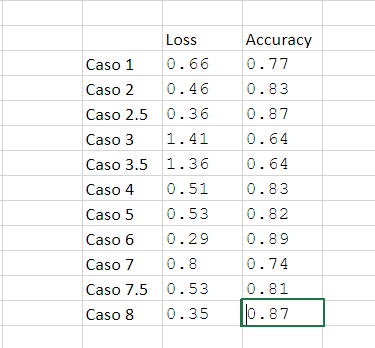



*   En los casos 1 y 2 ambos tienen capas de 10 neuronas y función de activación 
'relu' , lo que cambia es el optimizador. En el caso 1, el optimizador es el 'sgd' y observamos que tiene una precisión de 0.77 y el del caso 2, el 'rmsprop' con una precisión de 0.83. Por tanto podemos concluir que es más preciso el 'sgd'.
*   En los casos 3 y 4 ambos tienen capas de 10 neuronas y función de activación 'sigmoid' , lo que cambia es el optimizador. En el caso 3, el optimizador es el 'sgd' y observamos que tiene una precisión de 0.64 y el del caso 4, el 'rmsprop' con una precisión de 0.83. Por tanto podemos concluir que es más preciso el optimizador 'sgd'.
*  Comparando la función de activación'relu' y 'sigmoid' de los casos 1, 2, 3 y 4. La función de activación 'relu'(acc 0.77) tiene mayor precisión que 'sigmoid' (acc 0.64)


*   En los casos 5 y 6 ambos tienen capas de 512 neuronas y función de activación 'relu' , lo que cambia es el optimizador. En el caso 5, el optimizador es el 'sgd' y observamos que tiene una precisión de 0.82 y el del caso 6, el 'rmsprop' con una precisión 0.89. Por tanto podemos concluir que es más preciso el optimizador 'rmsprop'.
*   En los casos 7 y 8 ambos tienen capas de 512 neuronas y función de activación 'sigmoid' , lo que cambia es el optimizador. En el caso 7, el optimizador es el 'sgd' y observamos que tiene una precisión de 0.74 y el del caso 8, el 'rmsprop' con una precisión 0.81. Por tanto podemos concluir que es más preciso el optimizador 'rmsprop'.

*   Comparando la función de activación'relu' y 'sigmoid' de los casos 5, 6, 7 y 8. La función de activación 'relu' tiene mayor precisión que 'sigmoid'.

*  En los casos 2.5, 7.5 añadimos 25 épocas lo que nos lleva al sobreentrenamiento de nuestro modelo.

*   Por último, observamos que los modelos con 10 neuronas son menos precisas que los modelos con 512 neuronas.







